# SpaceX Falcon 9 First Stage Landing Prediction


    1-Exploratory Data Analysis
    2-Preparing Data Feature Engineering


Falcon 9 first stage will land successfully

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#EDA
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(URL)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


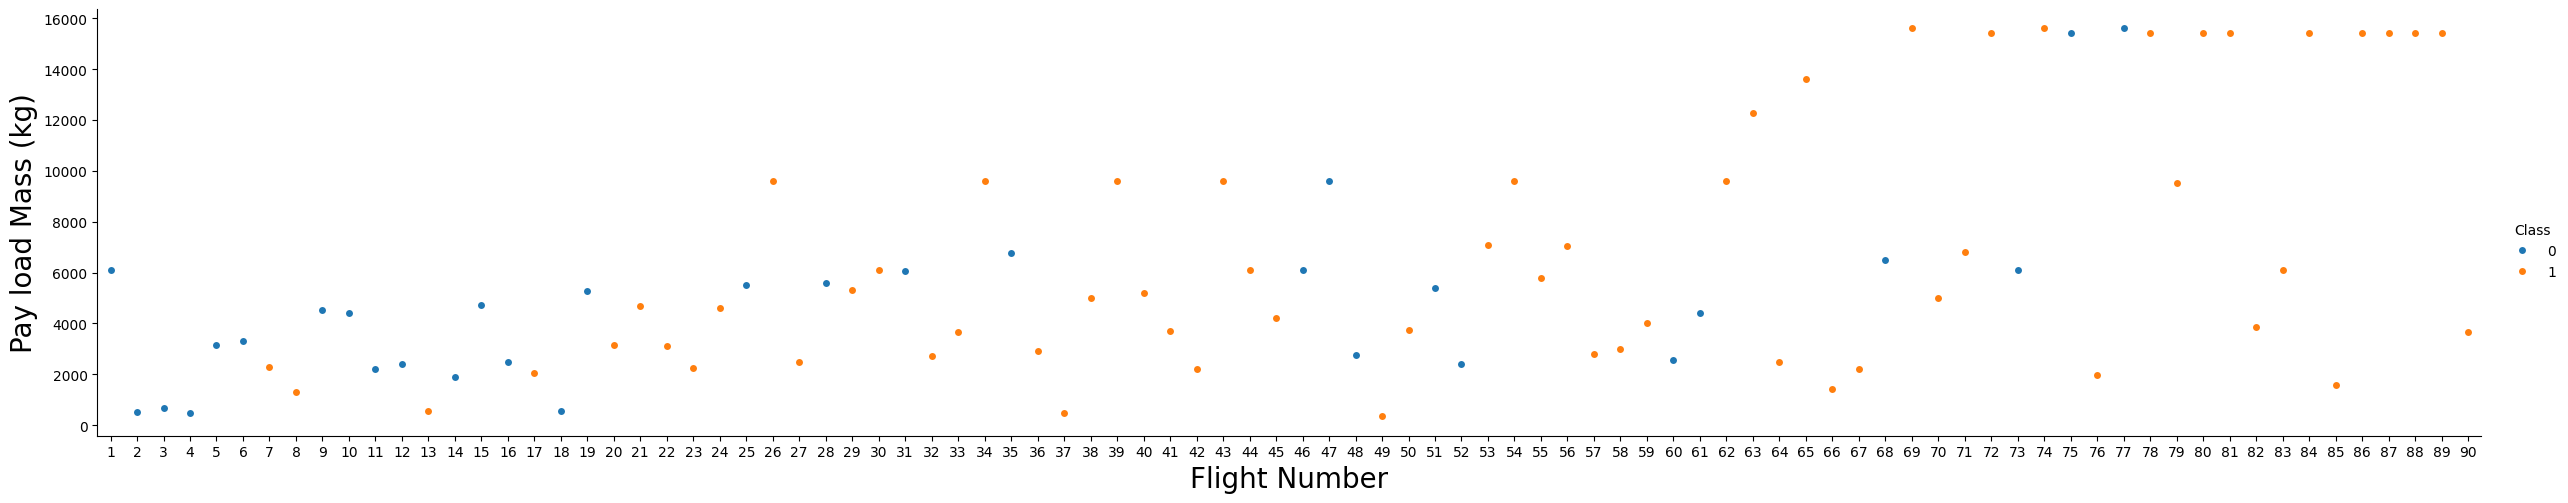

In [3]:
#let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

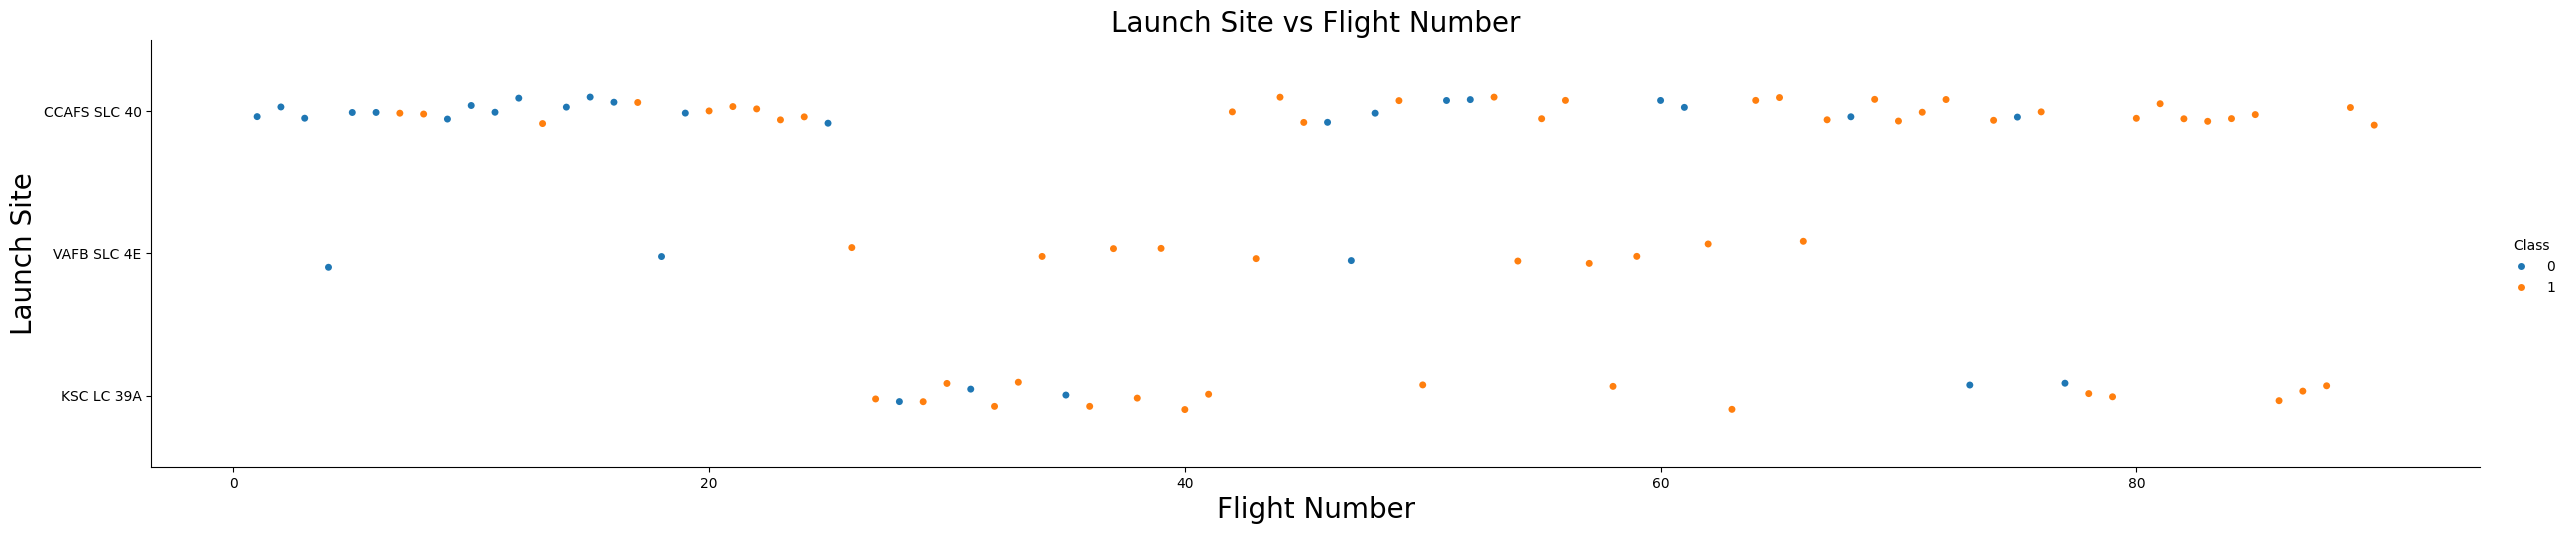

In [4]:
#Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Launch Site vs Flight Number",fontsize=20)
plt.show()

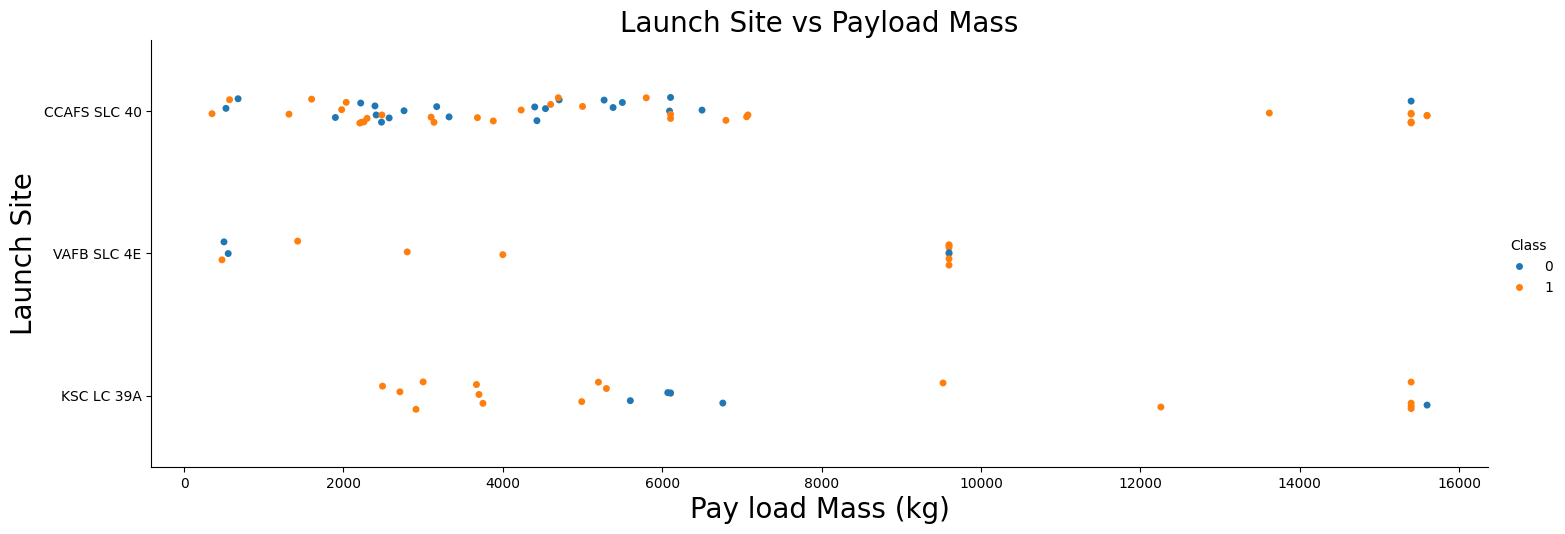

In [5]:
#Visualize the relationship between Payload Mass and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Launch Site vs Payload Mass",fontsize=20)
plt.show()

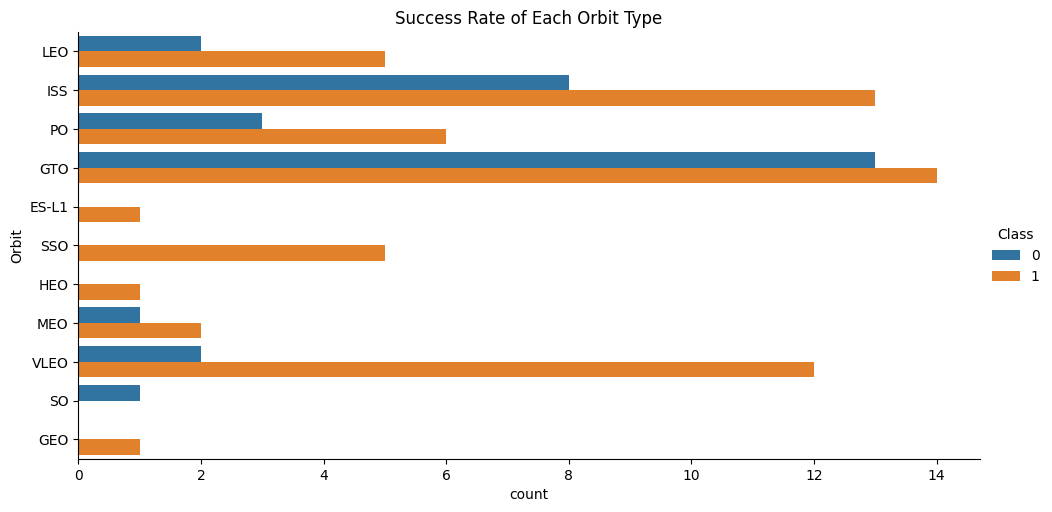

In [6]:
#Visualize the relationship between success rate of each orbit type
sns.catplot(y="Orbit", hue="Class", data=df, kind="count", aspect = 2)
plt.title('Success Rate of Each Orbit Type')
plt.show()

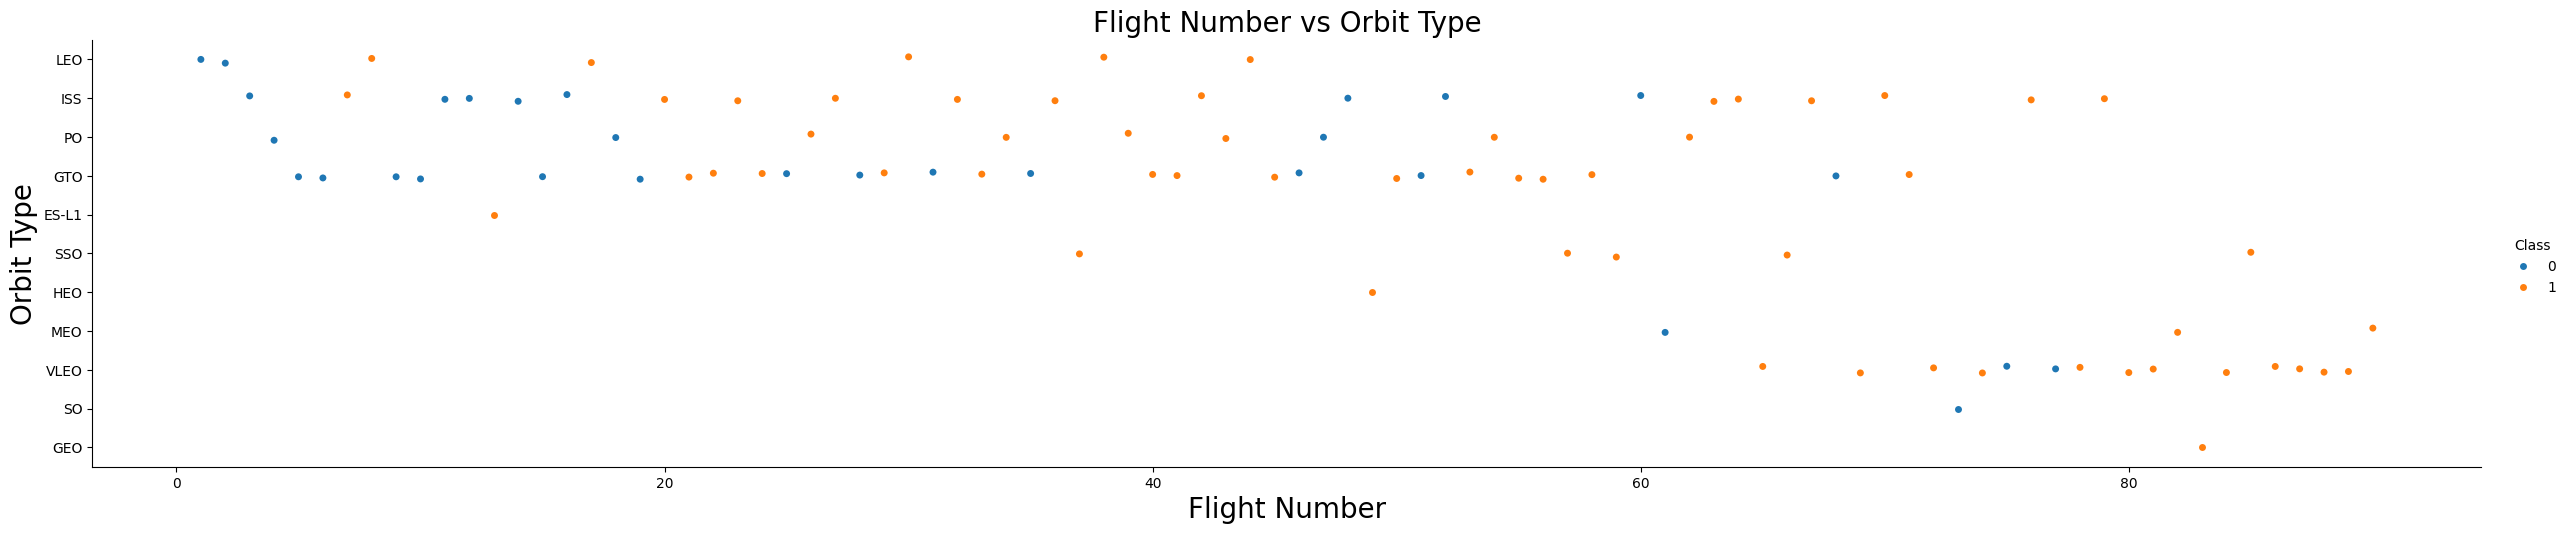

In [7]:
# Visualize the relationship between Flight Number and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Flight Number vs Orbit Type", fontsize=20)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success

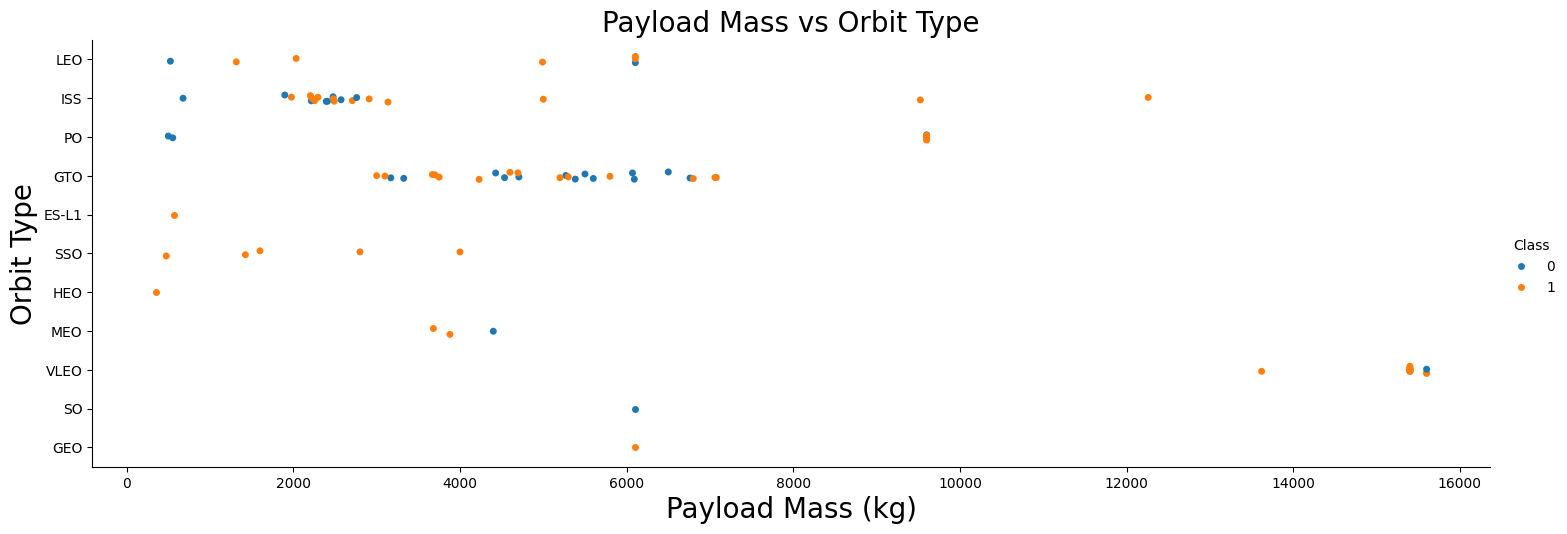

In [8]:
# Visualize the relationship between Payload Mass and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=3)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Payload Mass vs Orbit Type", fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


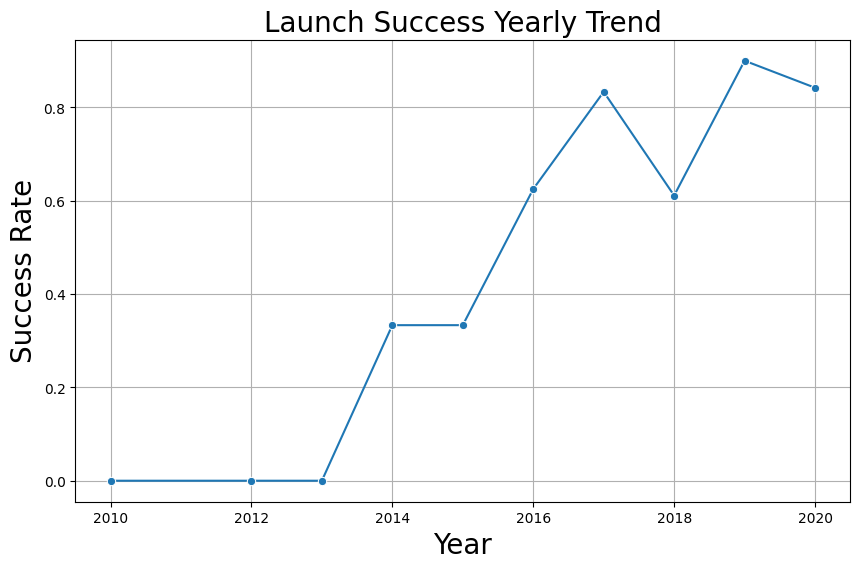

In [9]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Group by year and calculate the success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plot the yearly success trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('Launch Success Yearly Trend', fontsize=20)
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

# Features Engineering

We should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [11]:
# Create dummy variables for categorical columns in the features dataframe
features_dummies = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the dataframe with dummy variables
features_dummies.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.feature_selection import mutual_info_classif

# Select features and target variable
X = df[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']]
y = df['Class']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display the mutual information
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

print(mutual_info_df)

        Feature  Mutual Information
0          Legs            0.294852
1      GridFins            0.240663
2   ReusedCount            0.171474
3         Block            0.116839
4  FlightNumber            0.115956
5      Latitude            0.075119
6   PayloadMass            0.032518
7       Flights            0.000000
8        Reused            0.000000
9     Longitude            0.000000


In [13]:
features_dummies = features_dummies.astype('float64')

print(features_dummies.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [14]:
features_dummies.to_csv('dataset_part_5.csv', index=False)